<a href="https://colab.research.google.com/github/FelipeGBarreto/alura-git/blob/master/Stroker_Analysis_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=purple size=6 face="cursive"><u>Dataset</u>  - <i><q>Stroker</q></i>
- <font color=black size=3>Fonte: Kaggle

#<font color=cian size=5 face="cursive">Bibliotecas a serem utilizadas

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#<font color=cian size=5 face="cursive">Conjunto de dados


In [99]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df = df.drop(columns="id")

df.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


#<font color=cian size=5 face="cursive">Atribuindo valores numéricos aos alfabéticos

In [100]:
for field in df.columns:
    if np.dtype(df[field]) == 'object':
        print("{} --> {}".format(field,df[field].unique()))

gender --> ['Male' 'Female' 'Other']
ever_married --> ['Yes' 'No']
work_type --> ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type --> ['Urban' 'Rural']
smoking_status --> ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [101]:
df.gender = df.gender.map({'Male':1, 'Female':0})
df.ever_married = df.ever_married.map({'Yes':1, 'No':0})
df.Residence_type = df.Residence_type.map({'Urban':1, 'Rural':0})
df.work_type = df.work_type.map({'Private':1, 'Self-employed':2,'Govt_job':3, 
                                 'children':4,'Never_worked':5})
df.smoking_status = df.smoking_status.map({'formerly smoked':1, 'never smoked':2,
                                           'smokes':3, 'Unknown':4})

df=df.query("gender==1 or gender==0") # Retirei uma única linha que não havia identificação de gênero (sem representatividade)
df.gender = df.gender.astype('int32')

#<font color=cian size=5 face="cursive">Verificando se há valores em branco e subistituindo pela média dos valores
- <font color=black size=3>Campo 'bmi'

In [102]:
def preencher_nan (data_frame, campo):
    data_frame[campo] = data_frame[campo].fillna(data_frame[campo].mean())
    
preencher_nan(df,"bmi")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   int32  
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   int64  
 5   work_type          5109 non-null   int64  
 6   Residence_type     5109 non-null   int64  
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   int64  
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int32(1), int64(7)
memory usage: 459.0 KB


#<font color=cian size=5 face=cursive>Análise dos dados

<font color=darkgreen size=4 face=cursive>Quais variáveis estão mais relacionadas com derrames cerebrais?

In [103]:
print("Correlação entre quem teve derrame e as demais variáveis:")
df.corr()[-1:]

Correlação entre quem teve derrame e as demais variáveis:


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
stroke,0.009081,0.245239,0.127891,0.134905,0.108299,-0.058261,0.015415,0.131991,0.038917,-0.066471,1.0


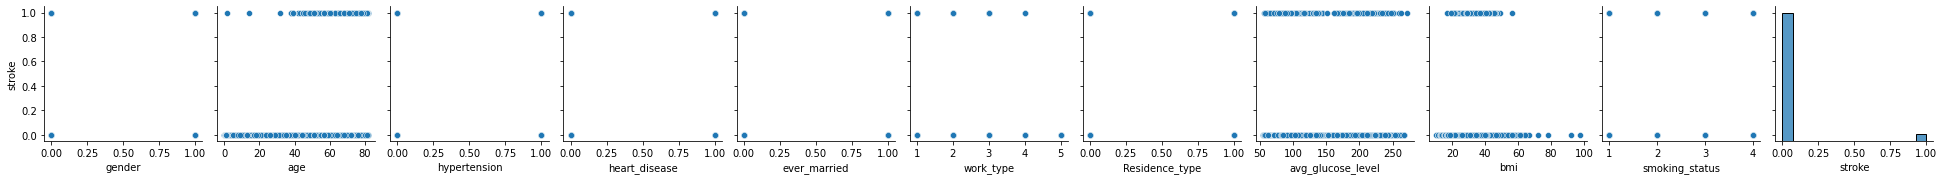

In [104]:
sns.pairplot(data=df,y_vars='stroke')

<font color= gray size=4 face=cursive>

*   Há cinco variáveis que mais chamam a atenção, as quais mostram uma corelação com a variável derrame, são elas:
  - age;
  - heart_disease;
  - avg_glucose_level;
  - hypertension;
  - ever_married.


In [119]:
df[["stroke","age","heart_disease","avg_glucose_level","hypertension","ever_married"]].corr()[-1:]

,stroke,age,heart_disease,avg_glucose_level,hypertension,ever_married
ever_married,0.108299,0.679084,0.114601,0.155329,0.164187,1.0


Classes de idade:

    ► A: 0  - 20 anos
    ► B: 21 - 35 anos
    ► C: 36 - 50 anos
    ► D: 51 - 65 anos
    ► E: 66 - 82 anos

In [106]:
classes = [0, 20, 35, 50, 65, 82]
labels = ["00-20","21-35","36-50","51-65","66-82"]

classificando_age = pd.cut(x = df_stroke.age,bins = classes,labels = labels,include_lowest = True)

freq_age = pd.value_counts(classificando_age).sort_index()
freq_age_perct = pd.value_counts(classificando_age, normalize=True).sort_index()

print(f"Total de Pessoas entrevistadas: {df.gender.count()}")
print(f"Total de Pessoas da amostra que tiveram AVC: {df_stroke.gender.count()}\n")

dist_freq_age = pd.DataFrame({"freq":freq_age,"Perct (%)": 100*freq_age_perct.round(3)})

print("Percentual de pessoas que tiveram derrame de acordo com a idade:")
dist_freq_age.columns.name = "Classes de Idade"

dist_freq_age

Total de Pessoas entrevistadas: 5109
Total de Pessoas da amostra que tiveram AVC: 249

Percentual de pessoas que tiveram derrame de acordo com a idade:


Classes de Idade,freq,Perct (%)
00-20,2,0.8
21-35,1,0.4
36-50,20,8.0
51-65,70,28.1
66-82,156,62.7


<font color=green size=4 face=cursiva>Constatando através de gráficos

In [107]:
df["age_class"]=classificando_age
df_stroke["age_class"]=classificando_age

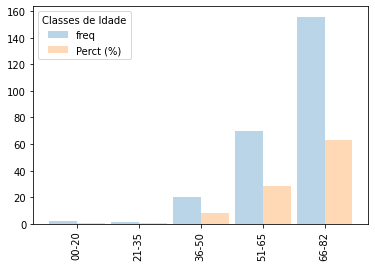

In [108]:
dist_freq_age.plot.bar(width=0.9, alpha=0.3, align='center');

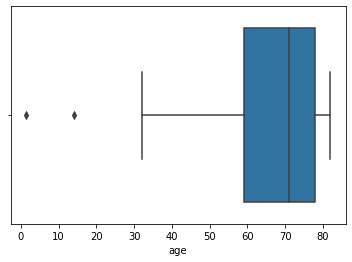

In [109]:
sns.boxplot(df_stroke.age);

Da amostra, tomando somente aquelas pessoas que já sofreram derrame em algum momento da vida, temos:
- Pessoas com idade superior a 59 anos que tiveram derrame é três vezes o número de pessoas com idade abaixo de 59 anos.

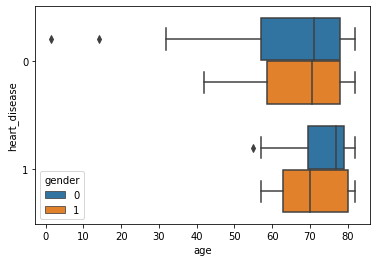

In [110]:
sns.boxplot(x='age', y='heart_disease',data=df_stroke, orient='h', hue='gender')

### Histograma de idade de pessoas entrevistadas

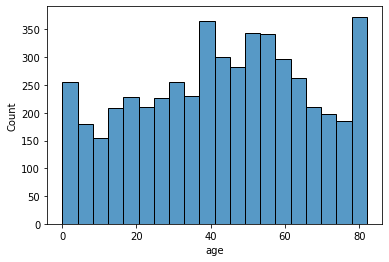

In [111]:
sns.histplot(df.age)

### Histograma de pessoas entrevistadas que sofreram derrame

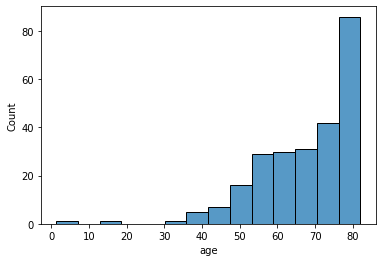

In [112]:
sns.histplot(df_stroke.age)

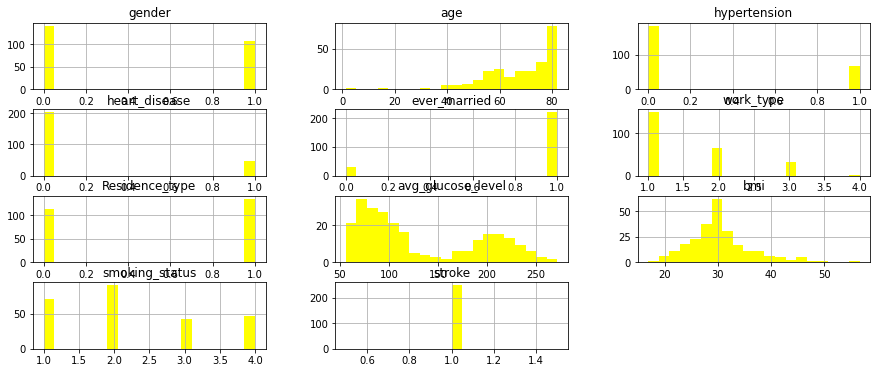

In [113]:
df_stroke.hist(bins=20, figsize=(15, 6), color='yellow');

<a>palavra</a>
<b>palavra</b>
<i>palavra</i>
<q>palavra</q>
<s>palavra</s>
<u>palavra</u>

<font size=4 color=red face="cursive"><b>palavra

In [114]:
df_stroke.groupby(["gender","age_class"])[["gender"]].count()

gender
gender age_class        
0      00-20         2.0
       21-35         1.0
       36-50        14.0
       51-65        33.0
       66-82        91.0
1      00-20         NaN
       21-35         NaN
       36-50         6.0
       51-65        37.0
       66-82        65.0

<font color=cian size=4 face=cursive><b>Previsão com análise regressiva